<a href="https://colab.research.google.com/github/ArtemBaron/baron_vergeles/blob/main/ml_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
! gdown 1PvuIrDm3CqfyR-hkJ5yCjs_cPIB_Ewlm

Downloading...
From: https://drive.google.com/uc?id=1PvuIrDm3CqfyR-hkJ5yCjs_cPIB_Ewlm
To: /content/Churn_Modelling.csv
100% 685k/685k [00:00<00:00, 109MB/s]


In [3]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df, train_size= 0.6, random_state=42, stratify = df['Exited'])

In [6]:
val, test = train_test_split(test, train_size= 0.5, random_state=42, stratify = test['Exited'])

In [7]:
train['age_group'] = pd.cut(train['Age'], [0, 31, 35, 40, 46, float('inf')])

In [8]:
model = train.groupby(['NumOfProducts', 'age_group'])['Exited'].mean().reset_index()


In [9]:
model = model.rename({'Exited': 'score_prod_age'}, axis = 1)


In [10]:
train = train.merge(model, how = 'left', on = ['NumOfProducts', 'age_group'])


In [11]:
test['age_group'] = pd.cut(test['Age'], [0, 31, 35, 40, 46, float('inf')])

In [12]:
test = test.merge(model, how = 'left', on = ['NumOfProducts', 'age_group'])


In [13]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 2.3 MB/s eta 0:00:00


In [14]:
from catboost import CatBoostClassifier


In [15]:
X = ['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

cat_features = ['Geography','Gender']

y = ['Exited']

In [16]:
from catboost import Pool

train_data = Pool(data=train[X],
                  label=train[y],
                  cat_features=cat_features
                 )

valid_data = Pool(data=val[X],
                  label=val[y],
                  cat_features=cat_features
                 )

In [17]:

params = {'verbose':100,
          'random_seed':42,
          'learning_rate':0.01}

In [18]:
model = CatBoostClassifier(**params)


In [19]:
model.fit(train_data,eval_set=valid_data)


0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 76.3ms	remaining: 1m 16s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 1.06s	remaining: 9.45s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 1.87s	remaining: 7.42s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 2.69s	remaining: 6.25s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 3.49s	remaining: 5.22s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 4.48s	remaining: 4.46s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 5.36s	remaining: 3.56s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 6.2s	remaining: 2.65s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 8s	remaining: 1.99s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 9.44s	remaining: 1.04s
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 12.2s	remaining: 0us

bestTest = 0.3185

In [20]:
test['score_catboost'] = model.predict_proba(test[X])[:,1]


In [21]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,"(46.0, inf]",0.236364,0.026803
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,"(35.0, 40.0]",0.209337,0.084712
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,"(40.0, 46.0]",0.108647,0.149411
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,"(35.0, 40.0]",0.061069,0.063715


<Axes: >

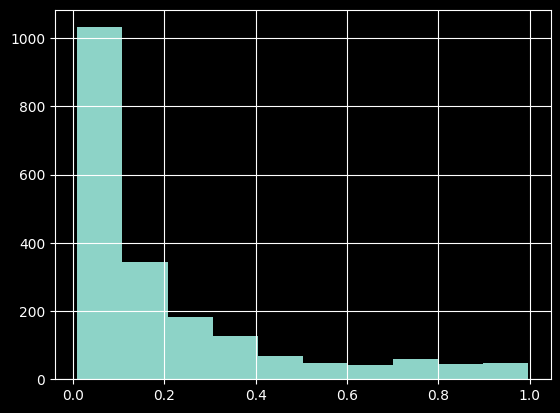

In [22]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")
test['score_catboost'].hist()

In [23]:
test['score_catboost'].mean()

0.2060167013696163

In [24]:
test['y_pred'] = (test['score_catboost'] > 0.5)*1

In [25]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost,y_pred
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,"(46.0, inf]",0.236364,0.026803,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,"(35.0, 40.0]",0.209337,0.084712,0
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,"(40.0, 46.0]",0.108647,0.149411,0
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,"(35.0, 40.0]",0.061069,0.063715,0


In [26]:
test['y_pred'].mean()

0.1225

In [27]:
test['Exited'].mean()

0.2035

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
tn, fp, fn, tp = confusion_matrix(test['Exited'],test['y_pred']).flatten()

In [30]:
tn, fp, fn, tp

(1537, 56, 218, 189)

FP = 1 type error, FN = 2 type error

In [31]:
recall = tp / (tp + fn)

In [32]:
print(recall)

0.4643734643734644


In [33]:
from sklearn.metrics import recall_score

In [34]:
recall_score(test['Exited'],test['y_pred'])

0.4643734643734644

In [35]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group,score_prod_age,score_catboost,y_pred
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,"(0.0, 31.0]",0.110764,0.131844,0
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,"(31.0, 35.0]",0.140449,0.074020,0
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,"(35.0, 40.0]",0.209337,0.186876,0
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,"(31.0, 35.0]",0.140449,0.087403,0
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,"(31.0, 35.0]",0.140449,0.056658,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,"(46.0, inf]",0.236364,0.026803,0
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,"(35.0, 40.0]",0.209337,0.084712,0
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,"(40.0, 46.0]",0.108647,0.149411,0
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,"(35.0, 40.0]",0.061069,0.063715,0


precision

In [36]:
precision = tp / (tp + fp)

In [37]:
print(precision)

0.7714285714285715


In [38]:
from sklearn.metrics import precision_score

In [39]:
precision_score(test['Exited'],test['y_pred'])

0.7714285714285715

F1


In [40]:
f1 = (2 * recall * precision)/(recall + precision)

In [41]:
f1

0.5797546012269938

In [42]:
from sklearn.metrics import f1_score

In [43]:
f1_score(test['Exited'],test['y_pred'])

0.5797546012269938

Accuracy

In [44]:
accuracy = tp + tn / (tp + fp + fn + fp)

In [45]:
(test['Exited'] == test['y_pred']).mean()

0.863

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(test['Exited'],test['y_pred'])

0.863

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(test['Exited'],test['y_pred']))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [50]:
test['score_catboost'].nunique()

2000

In [51]:
thrs = list(test['score_catboost'].unique())
#thrs - threshold

In [56]:
thrs = [0] + list(test['score_catboost'].unique())



In [62]:
t = pd.DataFrame(result,columns=['thr','f1'])


In [58]:
from tqdm.notebook import tqdm

result = []
for thr in tqdm(thrs):
  test['y_pred_new'] = (test['score_catboost'] > thr) * 1
  result.append((thr,
                 f1_score(test['Exited'],test['y_pred_new'])))

  0%|          | 0/2001 [00:00<?, ?it/s]

In [59]:
result[:10]


[(0, 0.3381803074366431),
 (0.13184386080460458, 0.5536277602523659),
 (0.07401954387476314, 0.47174447174447176),
 (0.18687567474270395, 0.5938069216757741),
 (0.0874034938715728, 0.4940239043824701),
 (0.056658162909274605, 0.43680709534368073),
 (0.06161072773132977, 0.44610091743119257),
 (0.5563161171624521, 0.5544871794871795),
 (0.20388734500811342, 0.6096153846153847),
 (0.0455555402676573, 0.40841457157516675)]

In [60]:
t = pd.DataFrame(result,columns=['thr','f1'])


In [61]:
t.sort_values('f1',ascending=False)


,thr,f1
640,0.277932,0.636771
623,0.280837,0.636569
1343,0.276637,0.636058
1756,0.331582,0.636025
1228,0.278005,0.635955
...,...,...
238,0.992916,0.019465
315,0.993195,0.014634
180,0.994941,0.009780
1205,0.997245,0.004902


In [63]:
t.sort_values('f1',ascending=False)


,thr,f1
640,0.277932,0.636771
623,0.280837,0.636569
1343,0.276637,0.636058
1756,0.331582,0.636025
1228,0.278005,0.635955
...,...,...
238,0.992916,0.019465
315,0.993195,0.014634
180,0.994941,0.009780
1205,0.997245,0.004902


In [64]:
t[t['f1'] == t['f1'].max()]


,thr,f1
640,0.277932,0.636771


In [65]:
thrs = [0] + list(test['score_prod_age'].unique())


In [66]:
len(thrs)


17

In [67]:

result = []
for thr in tqdm(thrs):
  test['y_pred_new'] = (test['score_prod_age'] > thr) * 1
  result.append((thr,
                 f1_score(test['Exited'],test['y_pred_new'])))
     

  0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['thr','f1'])


In [68]:
t[t['f1'] == t['f1'].max()]


,thr,f1
640,0.277932,0.636771


ROC: y - recall TPR (TP/P)vb  , x - FPR (FP/N)

In [69]:
from sklearn.metrics import roc_curve


In [71]:
fprs, tprs, thrs = roc_curve(test['Exited'],test['score_catboost'])



In [72]:
roc = pd.DataFrame({'fpr':fprs,'tpr':tprs,'thr':thrs})


In [73]:
roc

,fpr,tpr,thr
0,0.000000,0.000000,1.997318
1,0.000000,0.002457,0.997318
2,0.000000,0.061425,0.933737
3,0.000628,0.061425,0.933203
4,0.000628,0.120393,0.891551
...,...,...,...
391,0.979912,0.995086,0.012212
392,0.979912,0.997543,0.012198
393,0.998745,0.997543,0.009886
394,0.998745,1.000000,0.009809


In [77]:
test['score_catboost'].sort_values(ascending = False)

205     0.997318
1204    0.997245
179     0.994941
314     0.993195
237     0.992916
          ...   
682     0.010058
666     0.009886
1602    0.009809
377     0.009459
634     0.009371
Name: score_catboost, Length: 2000, dtype: float64

<Axes: xlabel='fpr'>

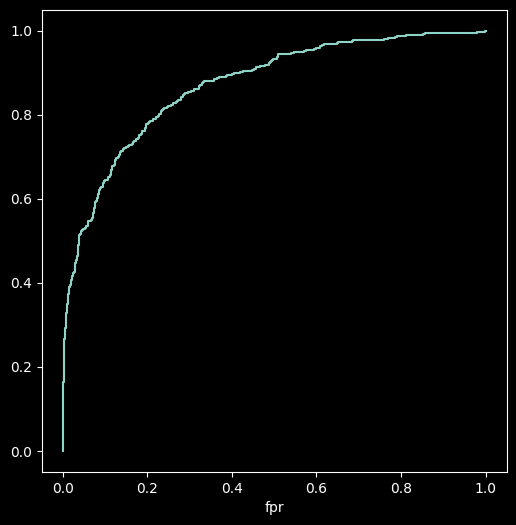

In [80]:
roc.set_index('fpr')['tpr'].plot(figsize=(6,6))


In [82]:
roc['random'] = roc['fpr']


In [83]:
roc['ideal'] = 1



<Axes: xlabel='fpr'>

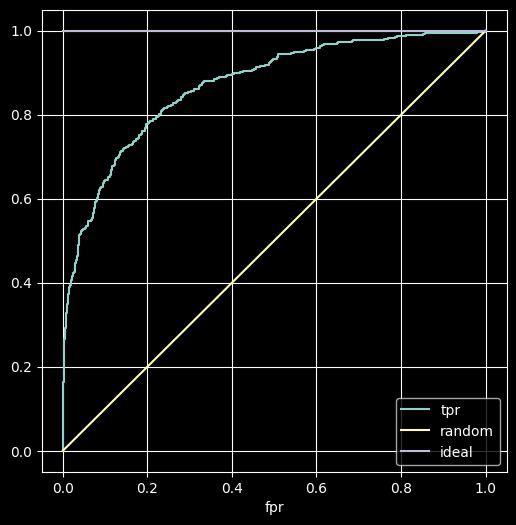

In [84]:
roc.plot(x='fpr',y=['tpr','random','ideal'],figsize=(6,6),grid=True)


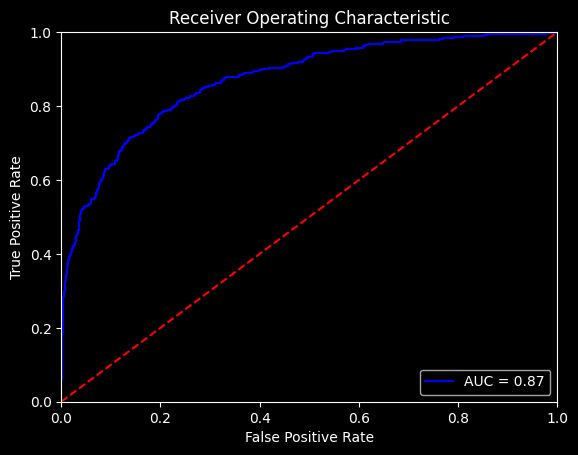

In [85]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(test['Exited'], test['score_catboost'])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [86]:
from catboost.utils import get_roc_curve


In [87]:
test_data = Pool(data=test[X],
                  label=test[y],
                  cat_features=cat_features
                 )

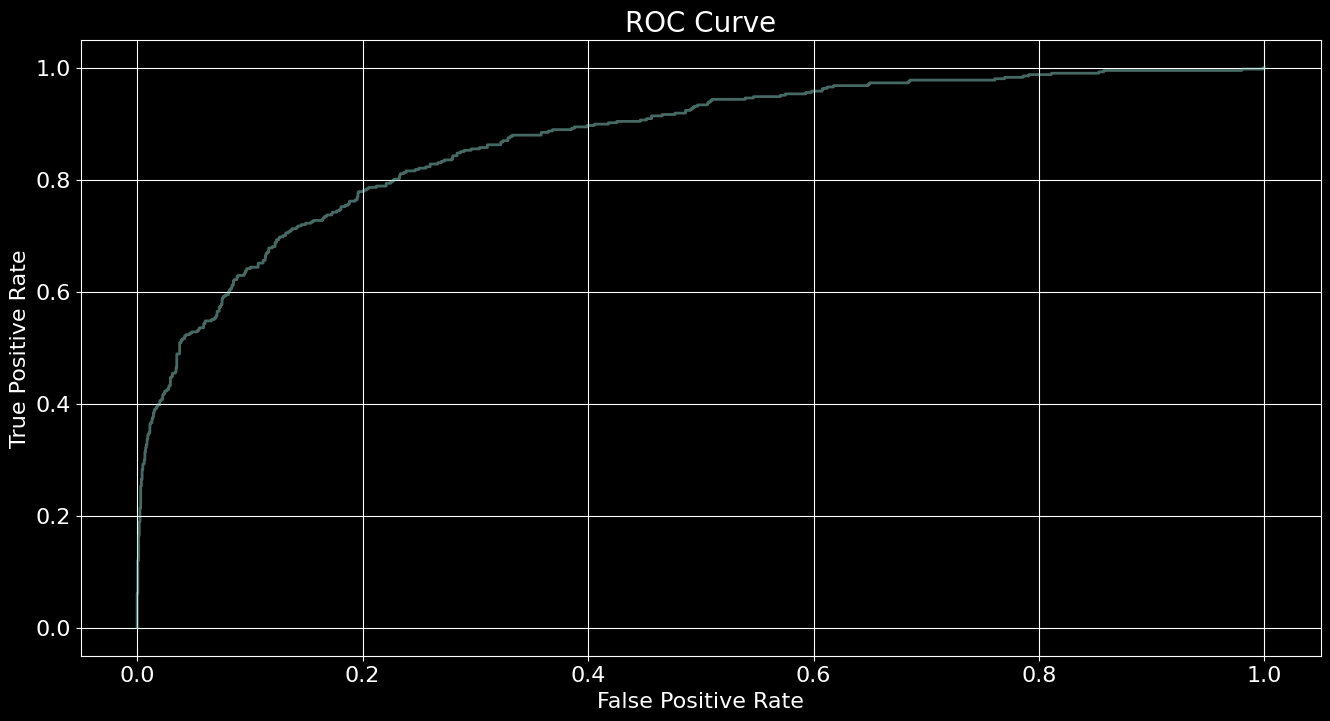

In [88]:
get_roc_curve(model,test_data,plot=True);


In [89]:
from sklearn.metrics import roc_auc_score


In [90]:
roc_auc_score(test['Exited'],test['score_catboost'])


0.8703063618317854

In [91]:

params = {'verbose':100,
          'eval_metric':'AUC',
          'random_seed':42,
          'learning_rate':0.01}

In [92]:
model = CatBoostClassifier(**params)


In [94]:
model.fit(train_data,eval_set=valid_data)


0:	test: 0.8338545	best: 0.8338545 (0)	total: 30.3ms	remaining: 30.3s
100:	test: 0.8725090	best: 0.8725090 (100)	total: 2s	remaining: 17.8s
200:	test: 0.8784656	best: 0.8784656 (200)	total: 3.07s	remaining: 12.2s
300:	test: 0.8812676	best: 0.8812676 (300)	total: 3.98s	remaining: 9.25s
400:	test: 0.8823868	best: 0.8824376 (390)	total: 4.85s	remaining: 7.24s
500:	test: 0.8834491	best: 0.8834522 (498)	total: 5.72s	remaining: 5.7s
600:	test: 0.8834737	best: 0.8836554 (564)	total: 6.62s	remaining: 4.4s
700:	test: 0.8837847	best: 0.8838694 (685)	total: 7.52s	remaining: 3.21s
800:	test: 0.8834383	best: 0.8838694 (685)	total: 8.39s	remaining: 2.08s
900:	test: 0.8829318	best: 0.8838694 (685)	total: 9.27s	remaining: 1.02s
999:	test: 0.8822744	best: 0.8838694 (685)	total: 10.1s	remaining: 0us

bestTest = 0.8838694083
bestIteration = 685

Shrink model to first 686 iterations.


In [101]:
t = pd.DataFrame({'y_true':[0]*990 + [1]*10})


In [102]:
t['y_true'].mean()


0.01

In [103]:
import numpy as np


In [104]:
np.random.uniform(0,0.2)


0.18440620773087957

In [107]:
np.random.uniform(0.8,1)


0.9108291932840609

In [106]:
np.concatenate([np.random.uniform(0,0.2,size=2),np.random.uniform(0.8,1,size=3)])


array([0.08921277, 0.07639207, 0.86284866, 0.94083243, 0.91243836])

In [108]:
t = pd.DataFrame({'y_true':[0]*990 + [1]*10})


In [109]:

np.random.seed(42)
t['y_score1'] = np.concatenate([np.random.uniform(0,0.2,size=970), # TN
                                np.random.uniform(0.8,1,size=20), # FP
                                np.random.uniform(0,0.2,size=5), # FN
                                np.random.uniform(0.8,1,size=5)]) # TP
     

In [110]:


np.random.seed(42)
t['y_score2'] = np.concatenate([np.random.uniform(0,0.2,size=850), # TN
                                np.random.uniform(0.8,1,size=140), # FP
                                np.random.uniform(0,0.2,size=2), # FN
                                np.random.uniform(0.8,1,size=8)]) # TP

In [111]:
roc_auc_score(t['y_true'],t['y_score2'])


0.873939393939394

Precision recall curve

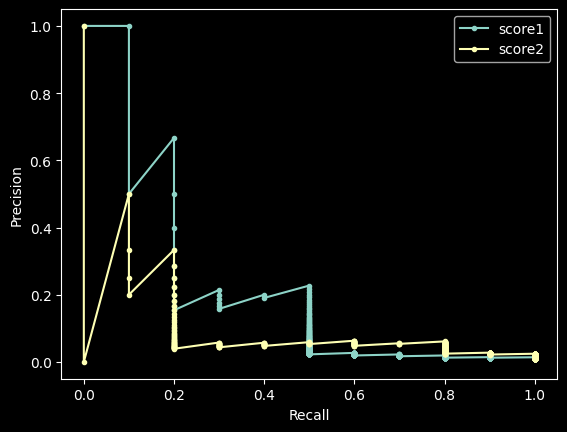

In [112]:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot

precision1, recall1, _ = precision_recall_curve(t['y_true'], t['y_score1'])
precision2, recall2, _ = precision_recall_curve(t['y_true'], t['y_score2'])


# plot the precision-recall curves
pyplot.plot(recall1, precision1, marker='.', label='score1')
pyplot.plot(recall2, precision2, marker='.', label='score2')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [97]:
from sklearn.metrics import average_precision_score


In [113]:
average_precision_score(t['y_true'],t['y_score1'])


0.2404742335681647

In [ ]:
average_precision_score(t['y_true'],t['y_score2'])
